**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [66]:

import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
from scipy import optimize

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [40]:
from Problem_1_sol import GovModel

In [41]:
GM = GovModel()
par = GM.par
sol_cb = GM.sol_cb
sol_ces = GM.sol_ces
GM.Q1()

G = 1.0:
Numerical solution: L = 15.3017
Analytical solution: L = 15.3017
G = 2.0:
Numerical solution: L = 15.3017
Analytical solution: L = 15.3017


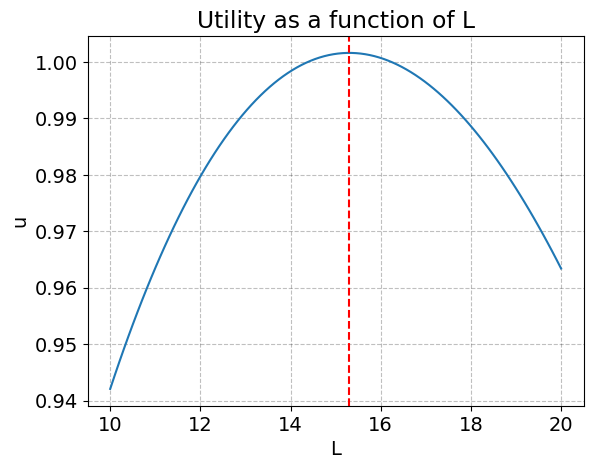

In [42]:
GM.verify_L_solve()

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

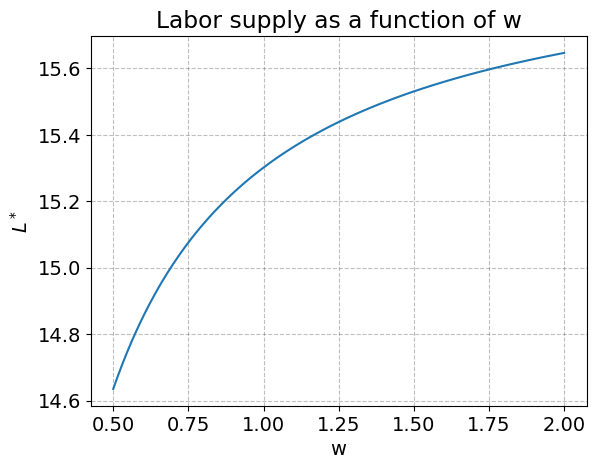

In [43]:
GM.plot_L()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


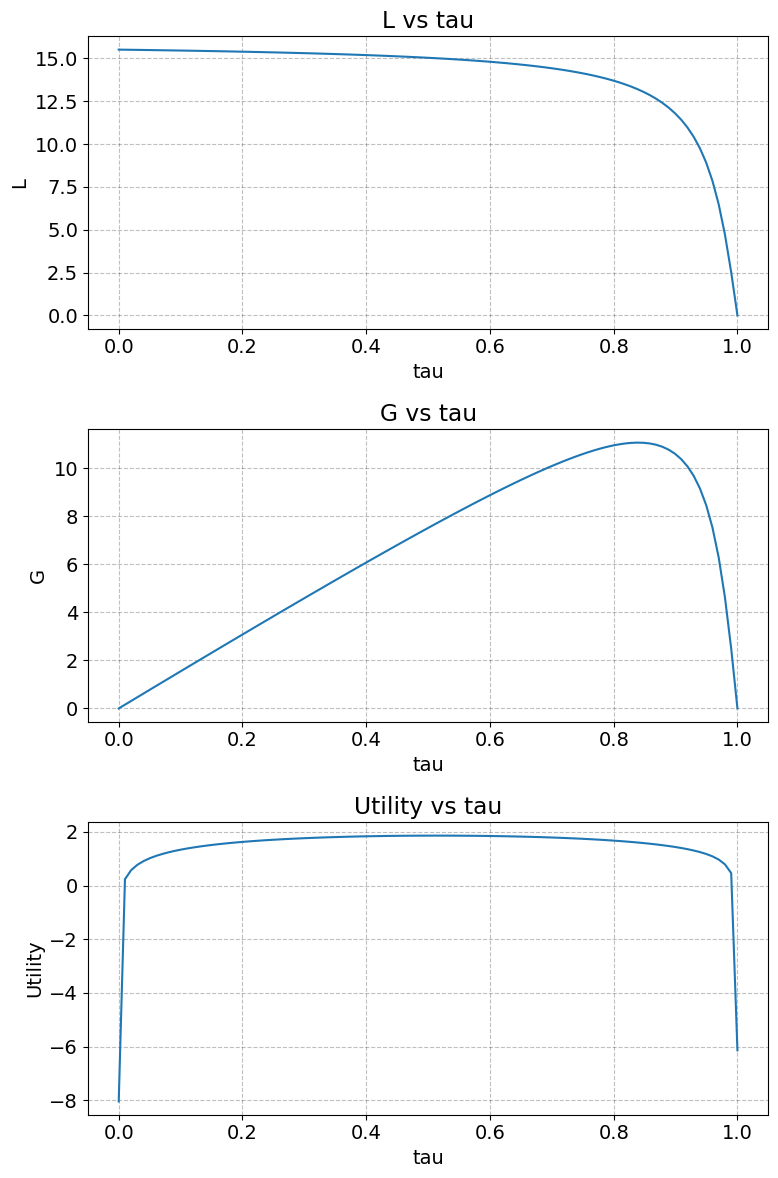

In [44]:
GM.Q3()

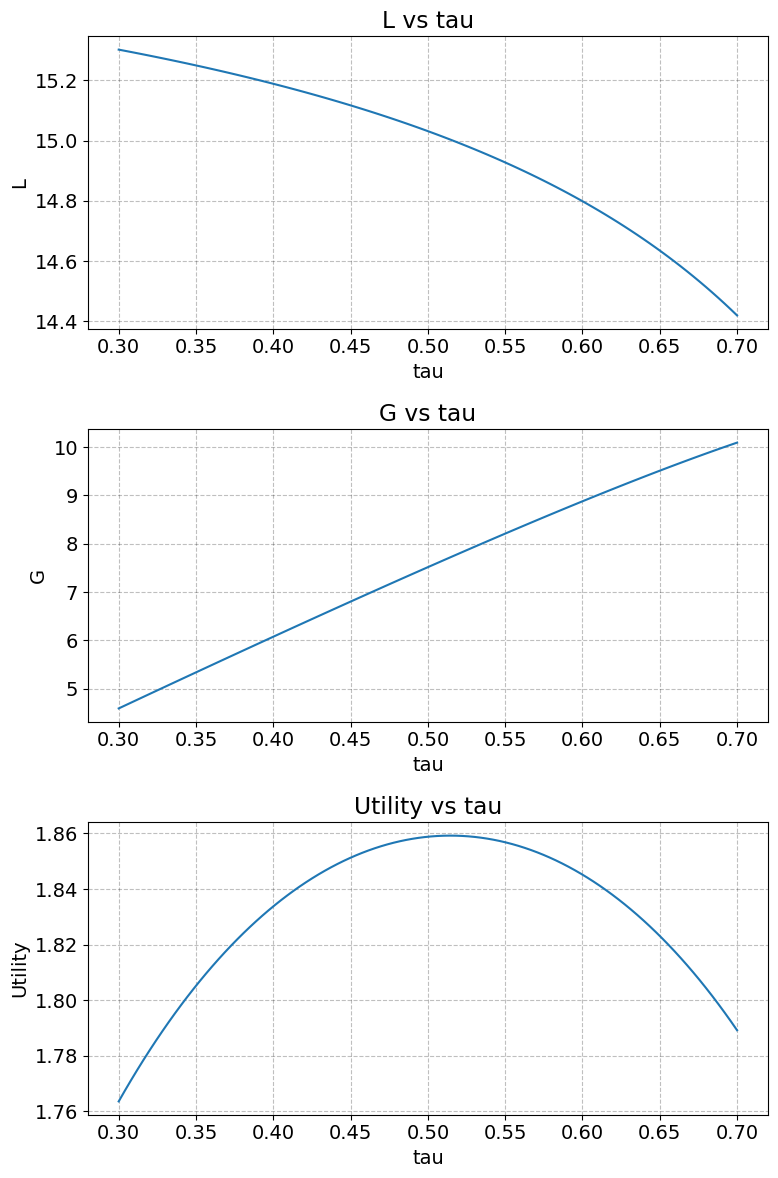

In [45]:
GM.Q3(tau_bounds=[0.3,0.7])

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [46]:
tau_star = GM.find_tau()   

The optimal tax rate is 0.5145
The optimal labor supply is 15.0032
The optimal government spending is 7.7196
The optimal utility is 1.8592


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

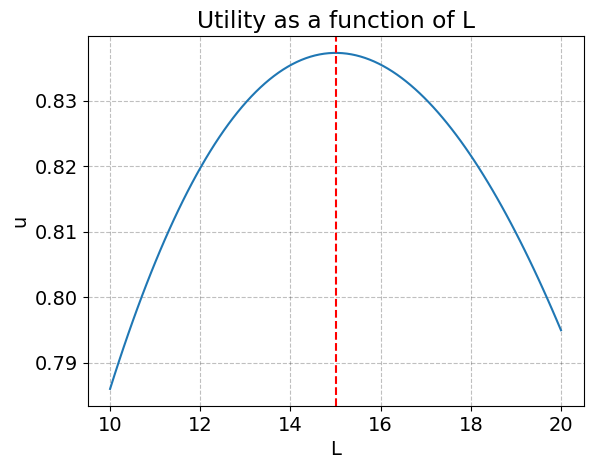

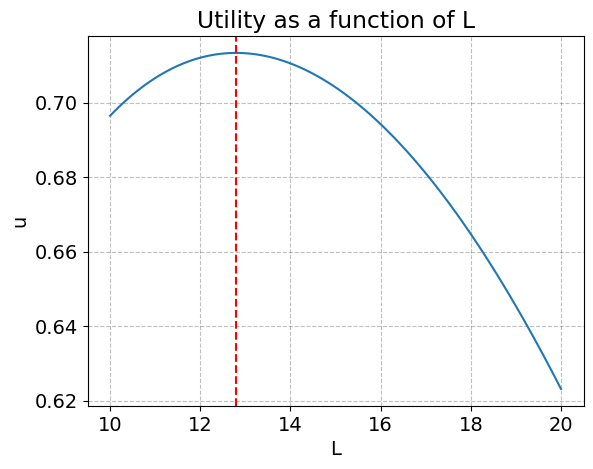

In [47]:
par.tau = tau_star
# verify solution with new function

par.sigma = 1.001
par.rho = 1.001

GM.verify_L_solve(utype='ces')
par.sigma = 1.5
par.rho = 1.5
GM.verify_L_solve(utype='ces')

7.7112 is the budget neutral government spending


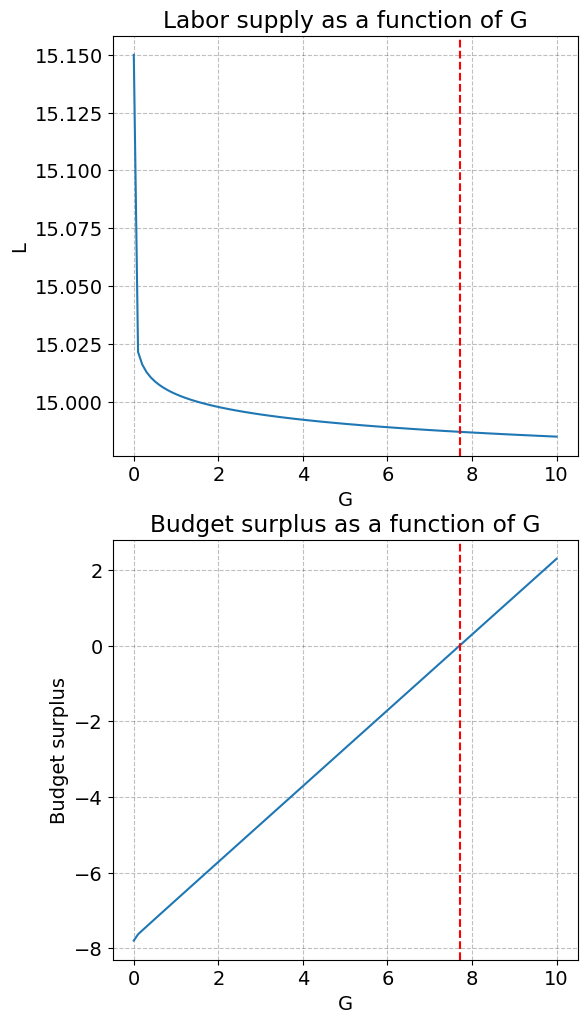

In [48]:
par.sigma = 1.001
par.rho = 1.001
GM.find_G(tau_star)

4.9752 is the budget neutral government spending


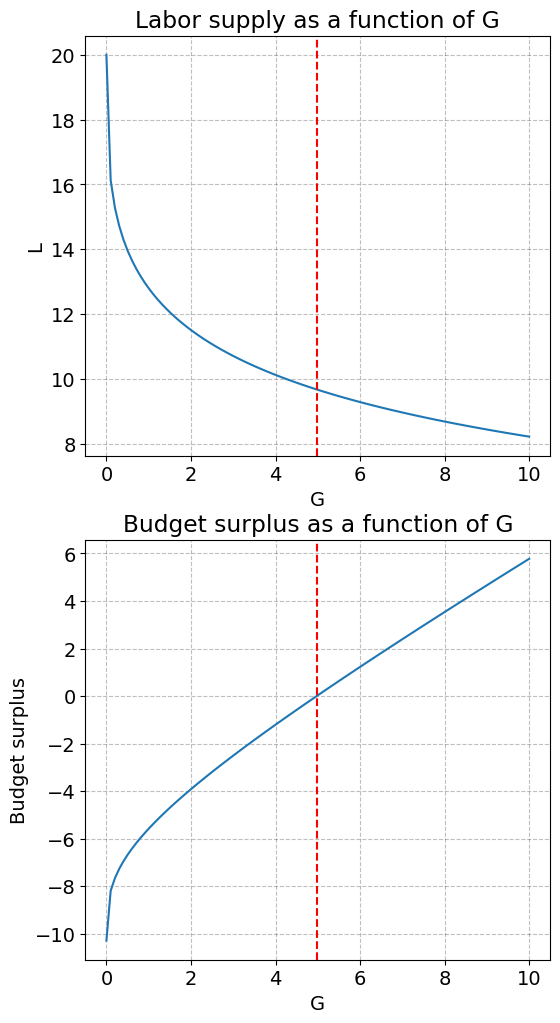

In [49]:
par.sigma = 1.5
par.rho = 1.5
GM.find_G(tau_star)

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

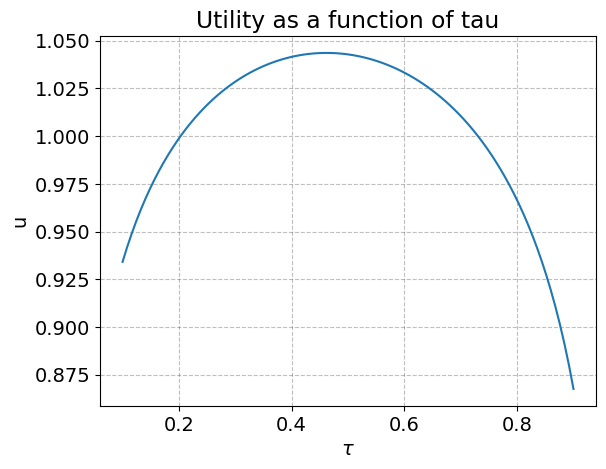

In [50]:
GM.plot_U_across_tau(utype='ces')

In [51]:
par.sigma = 1.001
par.rho = 1.001
tau_star2 = GM.find_tau(utype='ces')


The optimal tax rate is 0.5144
The optimal labor supply is 14.9871
The optimal government spending is 7.7096
The optimal utility is 1.8565


In [52]:
par.sigma = 1.5
par.rho = 1.5
tau_star2 = GM.find_tau(utype='ces')

The optimal tax rate is 0.4618
The optimal labor supply is 9.8889
The optimal government spending is 4.5666
The optimal utility is 1.0436


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

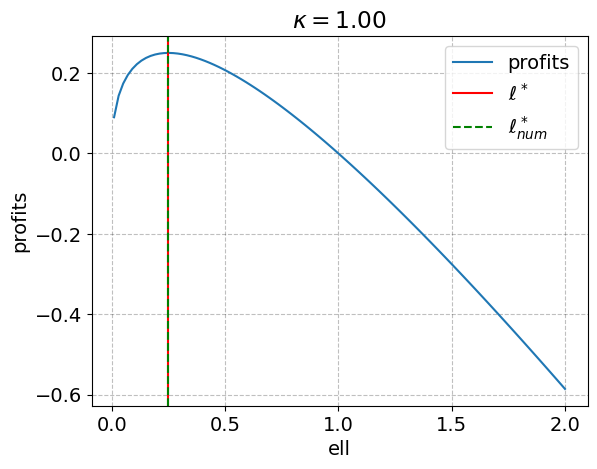

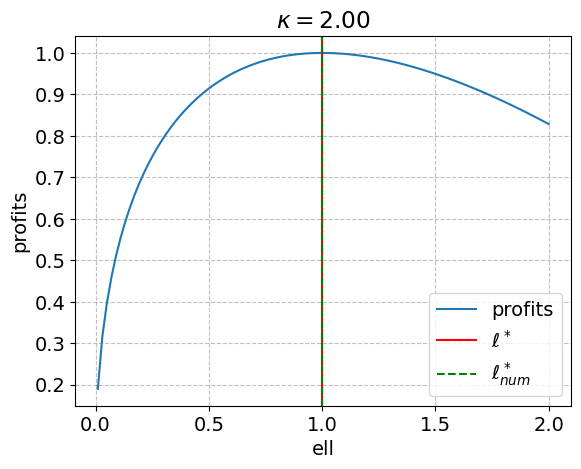

In [53]:
from Problem_2_sol import SalonClass
salon = SalonClass()
salon.plot_profits_static(kappa=1.0)
salon.plot_profits_static(kappa=2.0)

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R^{-1} \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K-1} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [54]:
np.random.seed(1997)
state = np.random.get_state()

In [55]:
salon.simulate(state=state)
salon.evaluate()

H = 27.67 for static_policy


In [56]:
# Check importance of the size of K
J = 100
for K in [10,100,500,1_000,5_000,10_000]:
    salon.par.K=K
    
    Hs = np.zeros(J)
    
    for j in range(J):
        salon.simulate()
        salon.evaluate(print_result=False)
        Hs[j] = salon.sim.H
    
    print('K =',K)
    print('Std H:',np.std(Hs))
    print(f'Min-max H: {np.min(Hs):.3f}-{np.max(Hs):.3f}')

    print('-----------')


K = 10
Std H: 1.5366660535673489
Min-max H: 24.138-31.789
-----------
K = 100
Std H: 0.5061474302599552
Min-max H: 26.611-29.183
-----------
K = 500
Std H: 0.2605017498426443
Min-max H: 27.071-28.347
-----------
K = 1000
Std H: 0.1678848984995982
Min-max H: 27.282-28.105
-----------
K = 5000
Std H: 0.06935118839808889
Min-max H: 27.547-27.860
-----------
K = 10000
Std H: 0.05284961254594148
Min-max H: 27.540-27.812
-----------


H = 27.67 for static_policy


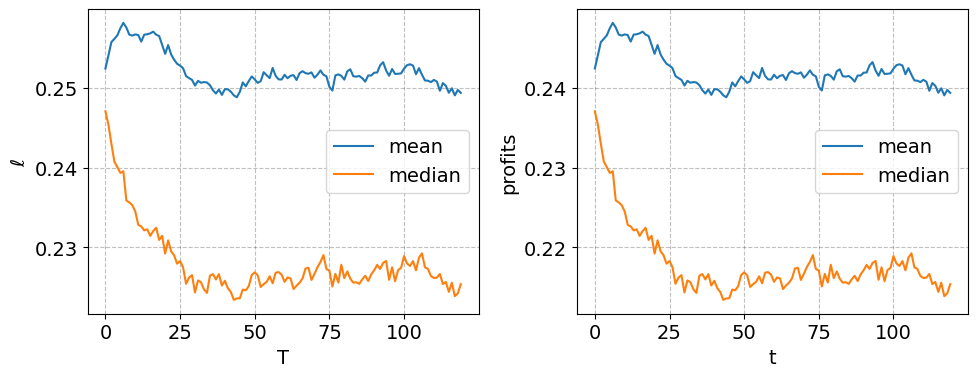

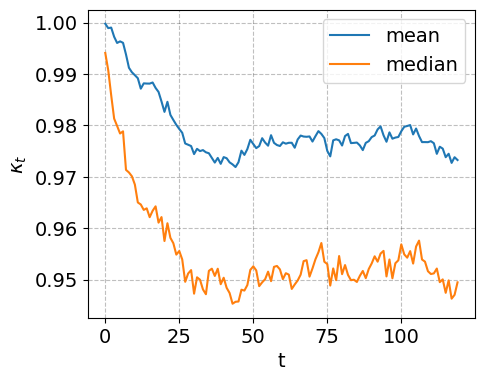

In [64]:
salon.simulate(state=state) # back to initial state
salon.evaluate()
salon.plot_policy_agg()

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [20]:
salon.evaluate('delta_policy')

H = 28.35 for delta_policy
Delta = 0.0500


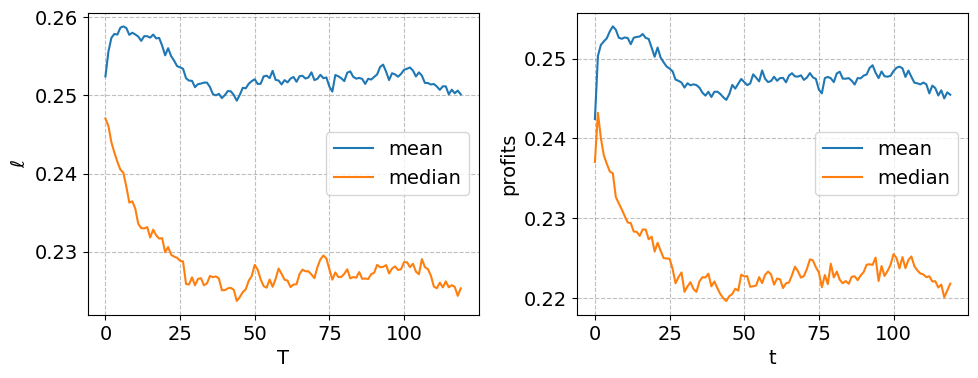

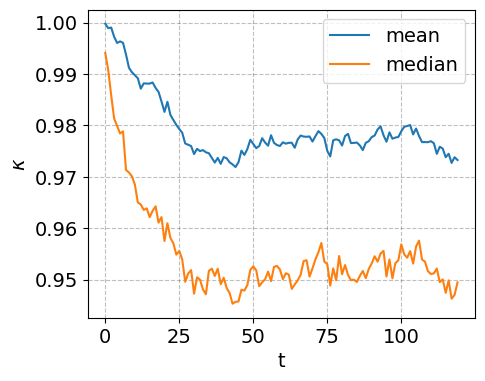

In [21]:
salon.plot_policy_agg()

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [22]:
salon.find_optimal_pars()

Optimized Delta = 0.0752
Optimal H       = 28.4102


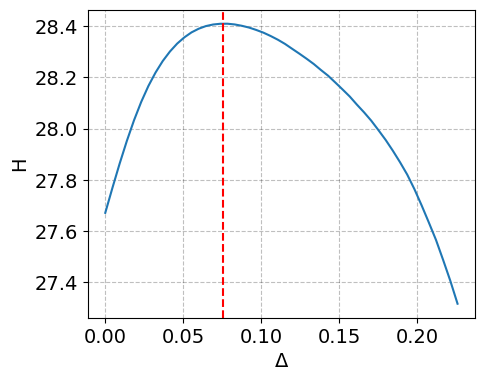

In [23]:
salon.plot_H_across_delta()

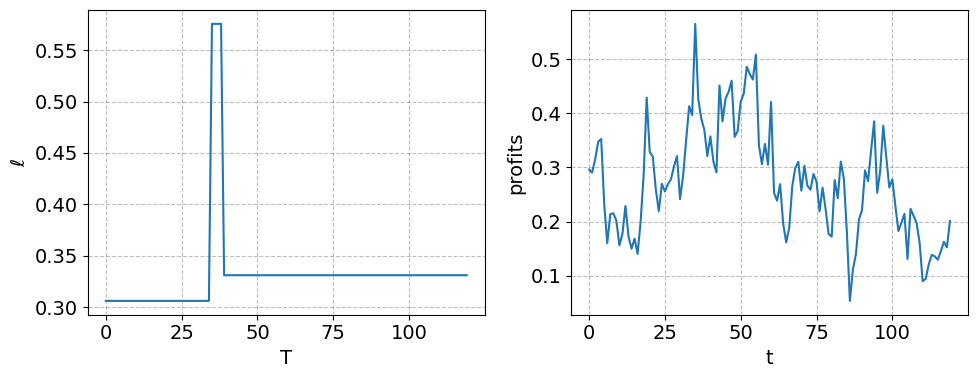

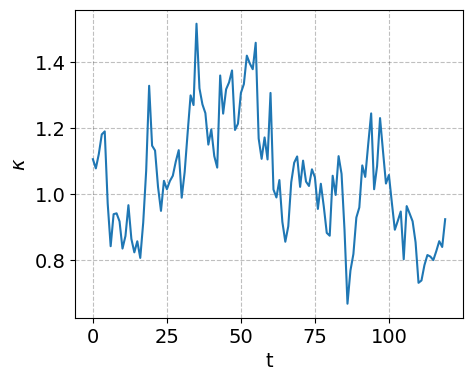

In [24]:
salon.plot_policy(k=100) # example

In [25]:
salon.ensure_optimal_pars(state=state)

E(Delta)   = 0.0763
Std(Delta) = 0.0009
E(H)       = 28.4171



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [26]:
salon.simulate(state=state) # Go back to initial state for comparison

In [27]:
salon.find_optimal_pars(policy ='alt_delta_policy',
                        opt_pars=['Delta','adjust'],
                        bounds=((0,None),(0.9,1.1)))

Optimized Delta = 0.0744
Optimized adjust = 0.9853
Optimal H       = 28.4118


In [28]:
salon.find_optimal_pars(policy='alt2_delta_policy',
                        opt_pars=['Delta','adjust','Delta_adjust'],
                        bounds=((0,None),(0.9,1.1),(-0.5,1.5)))

Optimized Delta = 0.0734
Optimized adjust = 0.9843
Optimized Delta_adjust = -0.0477
Optimal H       = 28.4109


In [65]:
salon.ensure_optimal_pars(policy='alt2_delta_policy',
                        opt_pars=['Delta','adjust','Delta_adjust'],
                        bounds=((0,None),(0.9,1.1),(-0.5,1.5)))

E(Delta)   = 0.0726
Std(Delta) = 0.0007
E(adjust)   = 0.9844
Std(adjust) = 0.0005
E(Delta_adjust)   = -0.0448
Std(Delta_adjust) = 0.0029
E(H)       = 28.4251


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [67]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [68]:
def refined_global_optimizer( K, K_warmup, bounds, tau):
    x_star = None
    f_star = np.inf
    x_k0_values = []

    for k in range(K):
        # A. Draw random x_k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        # B. If k < K_warmup go to step E
        if k >= K_warmup:
            # C. Calculate chi_k
            chi_k = 0.5 * (2 / (1 + np.exp((k - K_warmup) / 100)))

            # D. Set x_k0
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k

        x_k0_values.append(x_k0)

        # E. Run optimizer with x_k0 as initial guess
        result = optimize.minimize(griewank, x_k0, method='BFGS', tol=tau)

        # F. Set x_star = x_k_star if k = 0 or f(x_k_star) < f(x_star)
        if result.fun < f_star:
            x_star = result.x
            f_star = result.fun

        # G. If f(x_star) < tau go to step 4
        if f_star < tau:
            break

    # 4. Return the result x_star
    return x_star, np.array(x_k0_values)

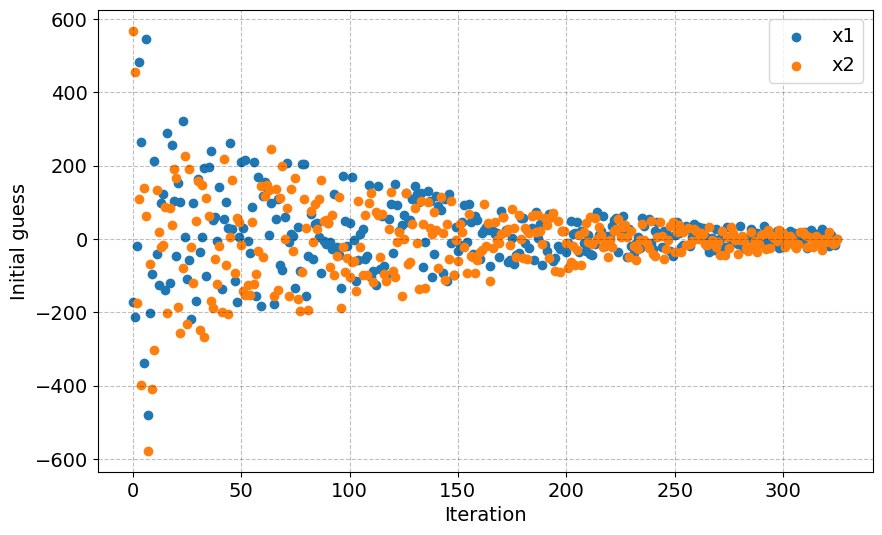

In [79]:
x_star, x_k0_values = refined_global_optimizer(K=1000, K_warmup=10, bounds=[-600, 600], tau=1e-8)
def plot_griewank(x_star, x_k0_values):
    # Plotting
    fig,ax = plt.subplots(figsize=(10, 6))

    ax.scatter(np.arange(x_k0_values.shape[0]),x_k0_values[:, 0], label='x1')
    ax.scatter(np.arange(x_k0_values.shape[0]),x_k0_values[:, 1], label='x2')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Initial guess')
    ax.legend()
    plt.show()
    
plot_griewank(x_star,x_k0_values)

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [31]:
# write your code here

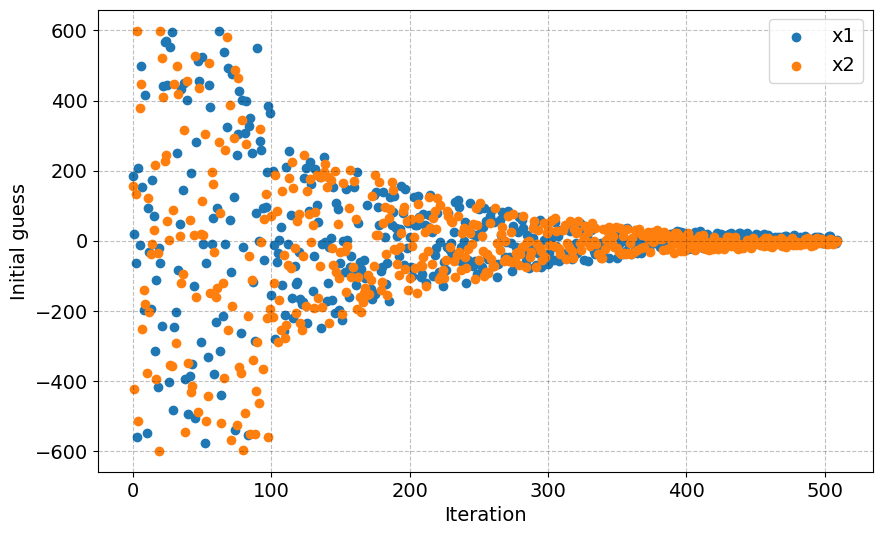

In [81]:
x_star, x_k0_values = refined_global_optimizer(K=1000, K_warmup=100, bounds=[-600, 600], tau=1e-8)
plot_griewank(x_star,x_k0_values)

In [84]:
for K_ubar in [10,100]:
    np.random.seed(10)
    print(f'### {K_ubar = } ###')
    iterations = []
    for i in range(10):
        x_star, x_k0_values = refined_global_optimizer(K=1000, K_warmup=K_ubar, bounds=[-600, 600], tau=1e-8)
        k = len(x_k0_values)
        print(f'Iteration {i} finsihed at k={k}, with x_star = {x_star}')
        iterations.append(len(x_k0_values))

    iteration = np.mean(iterations)
    print(f'Average number of iterations: {iteration}')
    print('')

### K_ubar = 10 ###
Iteration 0 finsihed at k=351, with x_star = [-2.79819220e-09 -8.60194161e-09]
Iteration 1 finsihed at k=388, with x_star = [-1.05970611e-09 -1.25399207e-08]
Iteration 2 finsihed at k=339, with x_star = [-1.34304222e-09 -1.36295306e-08]
Iteration 3 finsihed at k=326, with x_star = [-1.35199542e-08 -9.85181835e-09]
Iteration 4 finsihed at k=343, with x_star = [-5.70193854e-09 -1.02841105e-08]
Iteration 5 finsihed at k=189, with x_star = [-7.02075196e-09  3.04384606e-09]
Iteration 6 finsihed at k=352, with x_star = [-1.23166125e-08 -9.79943489e-09]
Iteration 7 finsihed at k=328, with x_star = [-5.83067082e-09  2.68065869e-09]
Iteration 8 finsihed at k=281, with x_star = [-1.50597975e-08 -3.79599632e-09]
Iteration 9 finsihed at k=269, with x_star = [ 3.55851930e-09 -7.64183241e-09]
Average number of iterations: 316.6

### K_ubar = 100 ###
Iteration 0 finsihed at k=439, with x_star = [-1.27714063e-08  2.49019822e-09]
Iteration 1 finsihed at k=485, with x_star = [-1.4899